In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [11]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///resources/hawaii.sqlite")

In [12]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [13]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [14]:
# Save references to each table
measurement=Base.classes.measurement
station=Base.classes.station

In [15]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [16]:
# Find the most recent date in the data set.
most_recent=engine.execute('select date from measurement order by date desc').first()
most_recent

('2017-08-23',)

2016-08-23


<Figure size 720x504 with 0 Axes>

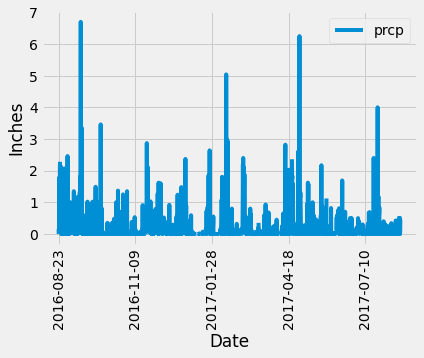

In [17]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
last_year=dt.date(2017,8,23)-dt.timedelta(days=365)
print(last_year)

# Perform a query to retrieve the data and precipitation scores
precip=session.query(measurement.date, measurement.prcp).\
filter(measurement.date>=last_year).\
order_by(measurement.date).all()
precip

# Save the query results as a Pandas DataFrame and set the index to the date column
precip_df=pd.DataFrame(precip,columns=['date', 'prcp'])
precip_df


# Sort the dataframe by date
precip_df=precip_df.set_index("date")
precip_df

#Use Pandas Plotting with Matplotlib to plot the data
plt.figure(figsize=(10,7))
precip_df.plot()
plt.xlabel('Date')
plt.ylabel('Inches')
plt.tick_params(axis='x',
        which='both',
        rotation=90,
        bottom=False,
        top=False)
plt.show()


In [18]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precip_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [19]:
# Design a query to calculate the total number stations in the dataset
session.query(station.station).count()

9

In [20]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active_stations=session.query(*[measurement.station,func.count(measurement.station)]).\
group_by(measurement.station).\
order_by(func.count(measurement.station).desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [21]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
active_station_data=session.query(*[func.min(measurement.tobs),func.max(measurement.tobs),func.avg(measurement.tobs)]).\
group_by(measurement.station).\
order_by(func.count(measurement.id).desc()).first()
active_station_data

(54.0, 85.0, 71.66378066378067)

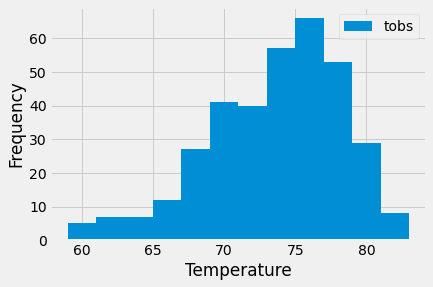

In [23]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
query= session.query(measurement.tobs).\
    filter(measurement.station == active_stations[0][0]).\
    filter(measurement.date >= last_year).all()
tob_df=pd.DataFrame(query, columns=['tob'])

plt.hist(tob_df, bins=12,rwidth=1,label='tobs')
plt.ylabel('Frequency')
plt.xlabel('Temperature')
plt.legend()
plt.show()

# Close session

In [24]:
# Close Session
session.close()